<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Edureka_VAE_in_keras_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1J6CNq2TdpbJnh7aRy2kWXlfw-MUj5YIv?usp=sharing#scrollTo=t1vMSPAOSLrz

###Install Required Libraries

In [14]:
# Install TensorFlow which includes Keras for building neural networks
# We'll use this to create an autoencoder that compresses and reconstructs images
!pip install -q tensorflow matplotlib numpy


###Import Libraries

In [15]:
#Import tensorflow/keras for model building and matplotlibfor visualization
#NumPy handles numerical operations on image data

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")
print(f"Tensorflow Version: {tf.__version__}")

Libraries imported successfully!
Tensorflow Version: 2.19.0


Variational Autoencoder (VAE) in Keras (Tensorflow 2.x) using the MNIST dataset (handwritten digits).

###Step 1: Define the Sampling Layer (Reparameterization Trick)

In [16]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

###Step 2: Build the Encoder

In [17]:
latent_dim = 2 #Latent space size
encoder_inputs = keras.Input(shape=(28, 28, 1))

x = layers.Flatten()(encoder_inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)

#Outputs: mean and log variance of latent space
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

z = Sampling()([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │    200,960 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     32,896 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 234,372 (915.52 KB)

 Trainable params: 234,372 (915.52 KB)

 Non-trainable params: 0 (0.00 B)

###Step 3: Build the Decoder

In [18]:
latent_inputs = keras.Input(shape=(latent_dim, ))
x = layers.Dense(128, activation='relu')(latent_inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(28 * 28, activation='sigmoid')(x)
decoder_outputs = layers.Reshape((28, 28, 1))(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       201,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,896 (917.56 KB)

 Trainable params: 234,896 (917.56 KB)

 Non-trainable params: 0 (0.00 B)

###Step 4: VAE Model with Custom training Loop

In [19]:
from functools import total_ordering
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name='total_loss')
        self.reconstruction_loss_tracker = keras.metrics.Mean(name='reconstruction_loss')
        self.kl_loss_tracker = keras.metrics.Mean(name='kl_loss')

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            #Reconstruction loss (binary cross-entropy)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )

            #KL divergence
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            'loss': self.total_loss_tracker.result(),
            'reconstruction_loss': self.reconstruction_loss_tracker.result(),
            'kl_loss': self.kl_loss_tracker.result()
            }

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

###Step 5: Load and Preprocess MNIST Data

In [20]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, -1)

###Step 6: Train the VAE

In [21]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x_train, epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - kl_loss: 7.1019 - loss: 236.8993 - reconstruction_loss: 229.7974
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - kl_loss: 4.7093 - loss: 169.1986 - reconstruction_loss: 164.4893
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - kl_loss: 5.0813 - loss: 162.6650 - reconstruction_loss: 157.5838
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 5.2858 - loss: 159.4186 - reconstruction_loss: 154.1328
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - kl_loss: 5.5049 - loss: 156.6007 - reconstruction_loss: 151.0958
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 5.6706 - loss: 154.4549 - reconstruction_loss: 148.7843
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 5.7780 - loss: 152.7138 - reconstruction_loss: 146.9358
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - kl_loss: 5.8479 - loss: 151.2451 - reconstruction_loss: 145.3972
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━

###Step 7: Generate New Digits from Latent Space

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

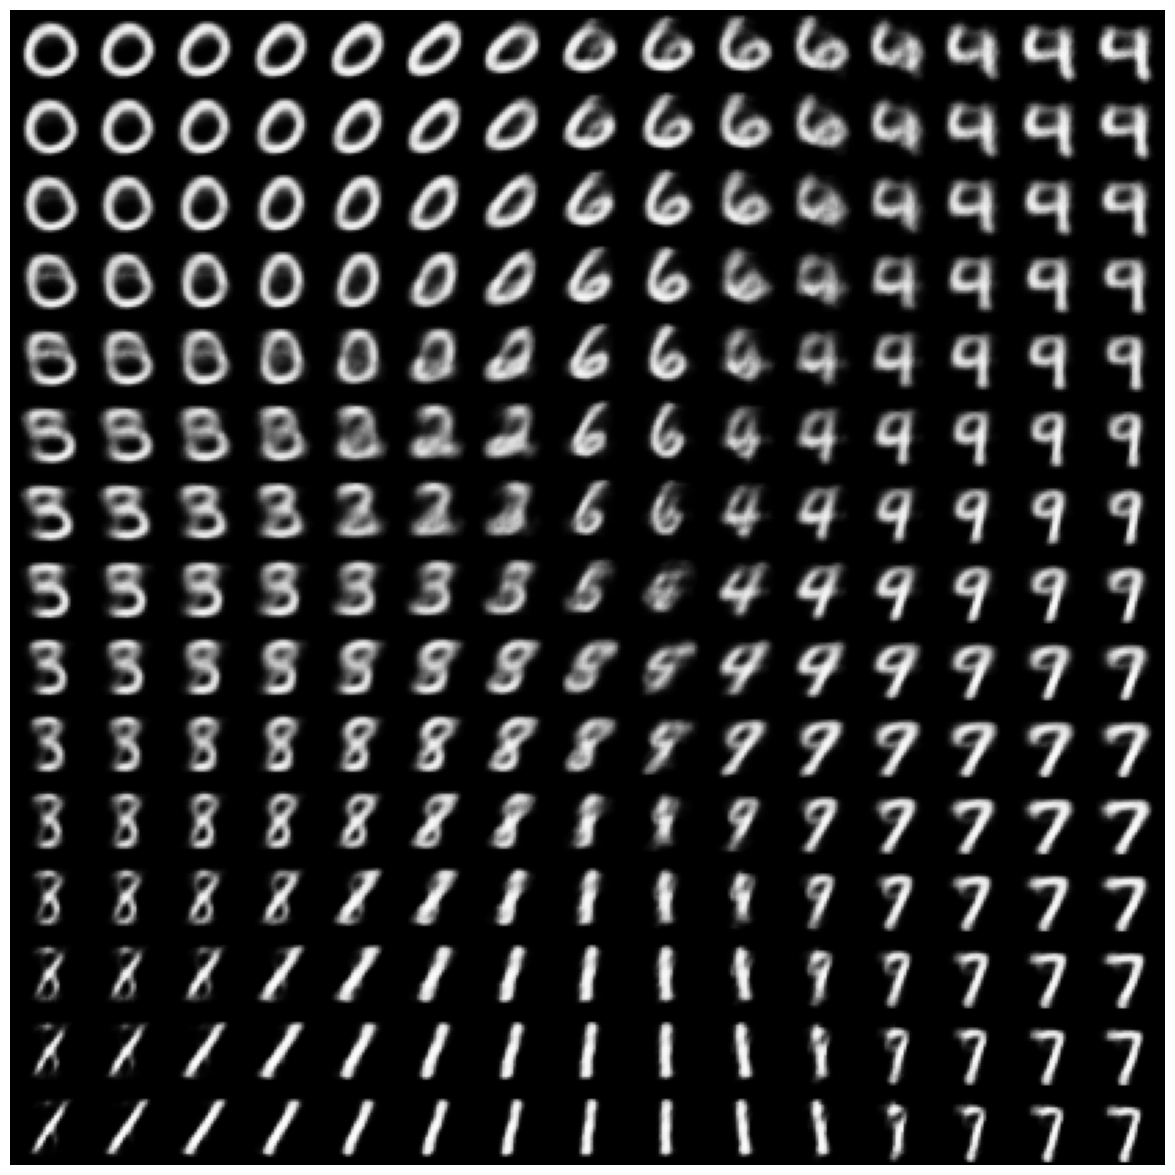

In [22]:
def plot_latent_space(decoder, n=15, figsize=15):
    #Display an n*n 2D manifold of digits
    digit_size = 28
    scale = 2.0
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n) [::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit
    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap='Greys_r')
    plt.axis('off')
    plt.show()

plot_latent_space(decoder)

## 🎯 **What You Did at the End**

You used the **decoder** part of the VAE to:

* **Sample points** from the 2D latent space (grid of [x, y] values).
* **Generate images** for each sampled point using the decoder.
* **Plot those images** in a grid.

Each image in the grid is a **digit generated by the model**.

---

## 🧭 Visual Output: What Are You Looking At?

* You created a **15×15 grid** (or whatever `n` you set).
* The horizontal and vertical axes represent **two dimensions** of the VAE's latent space (because `latent_dim = 2`).
* Each cell in the grid shows a **digit generated from one latent point**.

So you're basically saying:

> "Let’s feed this coordinate [x, y] into the decoder, and see what kind of digit it generates."

---

## 🔍 What the Grid Shows

### ✅ 1. **Each cell is a new digit**

* These are **not from the training data**.
* They are **generated** by the decoder from coordinates in the latent space.

### ✅ 2. **Smooth transitions across the grid**

* As you move left-to-right or top-to-bottom, the digits change **gradually**.
* For example, a '1' might slowly turn into a '7', then into a '9'.

This means:

> The VAE has **learned a smooth, continuous, and meaningful representation** of digits.

### ✅ 3. **Similar digits are grouped**

* You might notice:

  * '0' and '6' are near each other.
  * '1' and '7' are in the same region.
* This tells us that:

> The **VAE’s latent space is structured**: digits that look similar are mapped to **nearby points**.

### ✅ 4. **Some regions may be empty or fuzzy**

* You may find some digits look odd or blurry in certain parts of the grid.
* This usually happens if:

  * The model didn’t see enough examples for that area during training.
  * The latent space isn't fully "used".

Still, the fact that **most areas produce valid digits** means:

> The decoder has learned to map nearly any point in the latent space to a **plausible digit**.

---

## 🔬 Why This Matters

### 🔹 Unlike a regular autoencoder:

* A basic autoencoder might just memorize inputs and compress them without organizing the latent space.
* If you sample a random point, it may generate nothing meaningful.

### 🔹 With a VAE:

* The latent space is **constrained and regularized** (via KL divergence).
* So you can **sample any point**, and it will usually result in a **valid image**.

This makes VAEs **true generative models**.

---

## 🧠 Summary: What Your VAE Learned

| Concept                                   | What It Means                                                 |
| ----------------------------------------- | ------------------------------------------------------------- |
| **Latent Space**                          | A 2D map where each point represents a digit concept          |
| **Decoder**                               | A neural artist that draws digits from these concepts         |
| **Smooth Transitions**                    | The model understands how digits can morph into others        |
| **Generative Ability**                    | You can create *new* digits never seen in training            |
| **Disentangled Representation** (partial) | Changing position changes features (like loops, curves, etc.) |

---

## 🚀 What's Next?

If this was helpful and you're curious about what more you can do:

* ✅ Try **`latent_dim = 3` or more**, and visualize slices through the 3D latent space.
* 🖼️ Train on **fashion MNIST** or your own image dataset.
* 🎨 Build a **Conditional VAE** (CVAE): tell the model what number to generate.
* 💬 Use VAEs on **text** or **audio** data.
* 🔍 Explore **anomaly detection** by seeing how well it reconstructs unusual inputs.

Let me know which direction you'd like to explore next, and I’ll guide you through it!
